In [1]:
%cd ..

/home/marmot/Boyang/MEM-Nav


In [2]:
from PIL import Image
import os
import torch

/home/marmot/anaconda3/envs/onav/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from nav_vlm.dataset import NavDemoDataset

ROOT_DIR = "/home/marmot/Boyang/MEM-Nav/data/datasets/objectnav/mp3d_70k_demos_for_vlm"
SCENE = "17DRP5sb8fy"

dataset = NavDemoDataset(
    root_dir=ROOT_DIR, 
    scene_id=SCENE
)

In [4]:
full_demo = dataset[0]
print(full_demo.keys())
steps = len(full_demo['demonstration'])

dict_keys(['episode_id', 'floor_id', 'objectgoal', 'object_category', 'compass', 'gps', 'demonstration', 'reward', 'info', 'map_pos', 'map_dir', 'rgb_paths', 'depth_paths', 'panorama_sem_fts'])


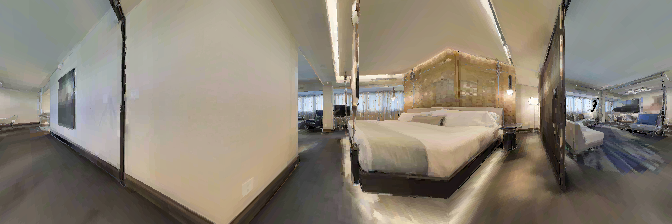

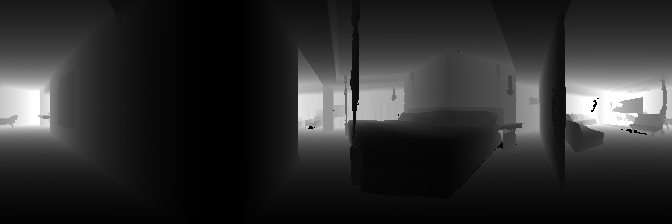

['TURN_RIGHT', 3]
reward: 0.26729036188125654
{'distance_to_goal': 0.7722294926643372, 'success': 0.0, 'spl': 0.0, 'softspl': 0.02055289880736282, 'goal_vis_pixels': 0.0}


In [8]:
goal_obj = full_demo['object_category']

for i in range(steps-3, steps):
    rgb = Image.open(full_demo['rgb_paths'][i]).convert("RGB")
    display(rgb)
    depth = Image.open(full_demo['depth_paths'][i]).convert("L") 
    display(depth)
    
    act = full_demo['demonstration'][i]
    print(act)
    reward = full_demo['reward'][i]
    print("reward:",reward)
    info = full_demo['info'][i]
    print(info)
    break

In [ ]:

os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
from qwen_vl_utils import process_vision_info

model_id = "Qwen/Qwen2.5-VL-3B-Instruct" 

model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
    model_id, 
    torch_dtype=torch.float32,
    device_map="cuda",
    attn_implementation="flash_attention_2",
)

# default processer
processor = AutoProcessor.from_pretrained(model_id)